# <a id='intro'>1. Contexto</a>  

Avito é um site de marketplace com a maior quantidade de anúncios classificados da Rússia.

O desafio é prever a demanda por um anúncio online com base em sua descrição completa (título, descrição, imagens, etc.), seu contexto (geograficamente onde foi postado, anúncios semelhantes já postados) e a demanda histórica por anúncios semelhantes em contextos semelhantes.

Desta forma, será possível informar os vendedores sobre a melhor forma de otimizar suas postagens e fornecer alguma indicação de quais itens são mais relevantes para o consumidor ao se considerar realizar uma compra efetiva no site de anúncios.

[Yandex Translate](https://translate.yandex.com/?lang=ru-en&text=Челябинск) para tradução de textos.

# Sumário

- <a href='#intro'>1. Contexto</a>
    - <a href='#ll'>1.1 Libs</a>
- <a href='#rtd'>2. Datasets</a>
     - <a href='#rrtd'>2.1 Importação dos dados</a>
     - <a href='#oot'>2.2 Visualização do dataset</a>
- <a href='#god'>3. Informações</a>
     - <a href='#sootd'>3.1 Informaçoes estatísticas</a>
     - <a href='#cfmd'>3.2 Valores Faltantes</a>
     - <a href='#cfmde'>3.3 Manipulação do dataset</a>
- <a href='#de'>4. Visualização dos dados</a>
     - <a href='#hadodp'>4.1 Histograma e distribuição da probabilidade de negócio</a>
     - <a href='#hadoap'>4.2 Classes de probabilidade de negócio</a>     
     - <a href='#hadoapi'>4.3 Histograma e distribuição do preço</a>     
     - <a href='#hadoapp'>4.4 Probabilidade de negócio em função do preço</a>     
     - <a href='#dodar'>4.5 Distribuição de itens por região</a>     
     - <a href='#dodari'>4.6 Distribuição de itens por cidade</a>
     - <a href='#dodara'>4.7 Probabilidade de negócio por região</a>
     - <a href='#dodare'>4.8 Distribuição de itens por categoria principal</a>
     - <a href='#dodai'>4.9 Probabilidade de negócio por categoria</a>
     - <a href='#dodao'>4.10 Distribuição de itens por categoria</a>
     - <a href='#dodart'>4.11 Distribuição do tipo de usuário</a>     
     - <a href='#doday'>4.12 Distribuição dos parâmetros 1, 2 e 3</a>     
- <a href='#t'>5. Série Temporal</a>
    - <a href='#fodsbdir'>5.1  Data de ativação nos dados de treino e teste</a>
    - <a href='#fodsbdit'>5.2  Distribuição da data de ativação</a>
    - <a href='#fodsbdiy'>5.3 Período de postagem de um Ad</a>
    - <a href='#fodsbdiu'>5.4  Tendência da variável preço</a> 
        - <a href='#paetsd'>5.4.1 Média do preço a cada dia</a>
        - <a href='#paetsdt'>5.4.2 Média do preço a cada dois dias</a>
        - <a href='#paetsdyu'>5.4.3 Probabilidade de negócio a cada dois dias</a>
        - <a href='#paetsdee'>5.4.4 Probabilidade de negócio a cada dois dias</a>
        - <a href='#tnodawdjshhs'>5.4.5 Período de exibição dos Ads</a>
    - <a href='#totar'>5.5 Comportamento da variáveis textuais</a>
        - <a href='#tnoda'>5.5.1 Variável descrição</a>
        - <a href='#tnodss'>5.5.2 Variável título</a>   
- <a href='#tr'>6. Feature Engineering</a>    
    - <a href='#5-15-1'>6.1 Features das séries temporais </a>
    - <a href='#5-15-2'>6.2 Featrues das variáveis textuais</a>
    - <a href='#5-15-3'>6.3 Conversão de featues categóricas para numéricas</a>
    - <a href='#5-15-4'>6.4 Exclusão de features</a>
- <a href='#7'>7 Análise Multivariada</a>
    - <a href='#7-1'>7.1 Correlação de Pearson</a>
    - <a href='#7-2'>7.2 Venn Diagram</a>
- <a href='#bsc'>8 Síntese</a>

## <a id='ll'>1.1 Libs</a>

In [1]:
import pandas as pd
import numpy as np 
from numpy import array

# Data viz
from plotly import tools
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt 
from matplotlib_venn import venn2
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
import plotly.tools as tls
import squarify
#from mpl_toolkits.basemap import Basemap

from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import datetime as dt
import warnings
import string
import time

# stop_words = []
import nltk
#nltk.download('stopwords')
stop_words = list(set(stopwords.words('russian')))
warnings.filterwarnings('ignore')
punctuation = string.punctuation

# Plotting Decision tree
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re

import pydot
import emoji
from googletrans import Translator

import translate

# <a id='rtd'>2. Datasets</a>

## <a id='rrtd'>2.1 Importação dos dados</a>

In [2]:
print("Leitura......")
periods_test = pd.read_csv('data/periods_test.csv', parse_dates=["activation_date", "date_from", "date_to"], nrows=1000)
periods_train = pd.read_csv('data/periods_train.csv', parse_dates=["activation_date", "date_from", "date_to"], nrows=1000)
test = pd.read_csv('data/test.csv', nrows=1000)
train = pd.read_csv('data/train.csv', nrows=1000)
print("Ok....")
# train_active = pd.read_csv('../input/train_active.csv')
# test_active = pd.read_csv('../input/test_active.csv')

Leitura......
Ok....


In [3]:
print("train data: ", train.shape)
print("test data: ", test.shape)
print("periods_train: ", periods_train.shape)
print("periods_test: ", periods_test.shape)

train data:  (1000, 18)
test data:  (1000, 17)
periods_train:  (1000, 4)
periods_test:  (1000, 4)


## <a id='oot'>2.2 Visualização do dataset</a>

**train data**

In [4]:
train.head(3)

item_id       user_id                region            city  \
0  b912c3c6a6ad  e00f8ff2eaf9  Свердловская область    Екатеринбург   
1  2dac0150717d  39aeb48f0017     Самарская область          Самара   
2  ba83aefab5dc  91e2f88dd6e3    Ростовская область  Ростов-на-Дону   

  parent_category_name               category_name  \
0          Личные вещи  Товары для детей и игрушки   
1      Для дома и дачи           Мебель и интерьер   
2  Бытовая электроника               Аудио и видео   

                       param_1 param_2 param_3                  title  \
0    Постельные принадлежности     NaN     NaN  Кокоби(кокон для сна)   
1                       Другое     NaN     NaN      Стойка для Одежды   
2  Видео, DVD и Blu-ray плееры     NaN     NaN         Philips bluray   

                                         description   price  item_seq_number  \
0  Кокон для сна малыша,пользовались меньше месяц...   400.0                2   
1          Стойка для одежды, под вешалки. С бутика.  3000.0               19   
2  В хорошем состоянии, домашний кинотеатр с blu ...  4000.0                9   

  activation_date user_type  \
0      2017-03-28   Private   
1      2017-03-26   Private   
2      2017-03-20   Private   

                                               image  image_top_1  \
0  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...       1008.0   
1  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...        692.0   
2  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...       3032.0   

   deal_probability  
0           0.12789  
1           0.00000  
2           0.43177

**test data**

In [5]:
test.head(3)

item_id       user_id                 region         city  \
0  6544e41a8817  dbe73ad6e4b5  Волгоградская область    Волгоград   
1  65b9484d670f  2e11806abe57   Свердловская область  Нижняя Тура   
2  8bab230b2ecd  0b850bbebb10  Новосибирская область       Бердск   

  parent_category_name           category_name                 param_1  \
0          Личные вещи  Детская одежда и обувь           Для мальчиков   
1        Хобби и отдых              Велосипеды                Дорожные   
2  Бытовая электроника           Аудио и видео  Телевизоры и проекторы   

  param_2 param_3             title  \
0   Обувь      25   Отдам бесплатно   
1     NaN     NaN  Продам велосипед   
2     NaN     NaN               BBK   

                                         description    price  \
0                                       На ангарском      NaN   
1  Продам велосипед KAMA  F200,в нормальном состо...   3000.0   
2  Продам новый телевизор BBK  32 диагональ смарт...  15000.0   

   item_seq_number activation_date user_type  \
0               66      2017-04-18   Private   
1                4      2017-04-16   Private   
2               15      2017-04-17   Private   

                                               image  image_top_1  
0  a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...       2020.0  
1                                                NaN          NaN  
2  8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...       2960.0

**periods train data**

In [6]:
periods_train.head(3)

item_id activation_date  date_from    date_to
0  8f5caef7afb0      2017-02-14 2017-03-15 2017-03-16
1  66218ff526d1      2017-02-16 2017-03-15 2017-03-18
2  b237d9539b21      2017-03-01 2017-03-15 2017-03-28

**periods test data**

In [7]:
periods_test.head(3)

item_id activation_date  date_from    date_to
0  f3a62a713278      2017-03-13 2017-04-12 2017-04-12
1  045ec5dabe07      2017-04-03 2017-04-12 2017-04-18
2  801d15e12e25      2017-04-17 2017-04-17 2017-04-18

# <a id='god'>3. Informações</a>
## <a id='sootd'>3.1 Informaçoes estatísticas</a>

**Train Data**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               1000 non-null   object 
 1   user_id               1000 non-null   object 
 2   region                1000 non-null   object 
 3   city                  1000 non-null   object 
 4   parent_category_name  1000 non-null   object 
 5   category_name         1000 non-null   object 
 6   param_1               956 non-null    object 
 7   param_2               553 non-null    object 
 8   param_3               406 non-null    object 
 9   title                 1000 non-null   object 
 10  description           933 non-null    object 
 11  price                 935 non-null    float64
 12  item_seq_number       1000 non-null   int64  
 13  activation_date       1000 non-null   object 
 14  user_type             1000 non-null   object 
 15  image                 

**Little description of training data for numerical features**

In [9]:
train.describe()

price  item_seq_number  image_top_1  deal_probability
count  9.350000e+02      1000.000000   921.000000       1000.000000
mean   2.886516e+05       581.199000  1234.806732          0.147510
std    2.548879e+06      3984.067311   964.680210          0.265910
min    0.000000e+00         1.000000    11.000000          0.000000
25%    5.000000e+02         9.000000   416.000000          0.000000
50%    1.200000e+03        28.000000  1108.000000          0.000000
75%    6.350000e+03        93.000000  2147.000000          0.171467
max    7.200000e+07     76411.000000  3063.000000          1.000000

**Little description of training data for categorical features**

In [10]:
train.describe(include=["O"])

item_id       user_id              region             city  \
count           1000          1000                1000             1000   
unique          1000           997                  28              190   
top     c7886f73f5ce  4b1f0d152f9f  Краснодарский край  Нижний Новгород   
freq               1             2                  76               43   

       parent_category_name           category_name         param_1 param_2  \
count                  1000                    1000             956     553   
unique                    9                      46             146      94   
top             Личные вещи  Детская одежда и обувь  Женская одежда   Обувь   
freq                    434                     182             140     100   

          param_3   title description activation_date user_type  \
count         406    1000         933            1000      1000   
unique         90     944         929              14         3   
top     42–44 (S)  Платье       Новый      2017-03-16   Private   
freq           36       9           2              83       712   

                                                    image  
count                                                 921  
unique                                                921  
top     85f90ec2d537c786f9776c2da2c4970d80677ae6fb53fe...  
freq                                                    1

 ## <a id='cfmd'> 3.2 Valores Faltantes</a>

**valores faltantes no dados treinamento **

In [11]:
# valores faltantes no train 
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data

Total  Percent
param_3                 594     59.4
param_2                 447     44.7
image                    79      7.9
image_top_1              79      7.9
description              67      6.7
price                    65      6.5
param_1                  44      4.4
category_name             0      0.0
user_id                   0      0.0
region                    0      0.0
city                      0      0.0
parent_category_name      0      0.0
deal_probability          0      0.0
title                     0      0.0
item_seq_number           0      0.0
activation_date           0      0.0
user_type                 0      0.0
item_id                   0      0.0

**Dados Faltantes no dataset period_train e period_test**

In [12]:
# checking missing data in periods data 
total = periods_train.isnull().sum().sort_values(ascending = False)
percent = (periods_train.isnull().sum()/periods_train.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data

Total  Percent
activation_date      1      0.1
date_to              0      0.0
date_from            0      0.0
item_id              0      0.0

## <a id='cfmde'> 3.3 Manipulação do dataset</a>
    
### Converter Dados

In [23]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

In [24]:
## Convert Russian to English

train['region_english'] = train['region'].apply(lambda x : region_map[x])
train['parent_category_name_english'] = train['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train['category_name_english'] = train['category_name'].apply(lambda x : category_map[x])

In [25]:
train.head()

item_id       user_id                 region              city  \
0  b912c3c6a6ad  e00f8ff2eaf9   Свердловская область      Екатеринбург   
1  2dac0150717d  39aeb48f0017      Самарская область            Самара   
2  ba83aefab5dc  91e2f88dd6e3     Ростовская область    Ростов-на-Дону   
3  02996f1dd2ea  bf5cccea572d              Татарстан  Набережные Челны   
4  7c90be56d2ab  ef50846afc0b  Волгоградская область         Волгоград   

  parent_category_name               category_name  \
0          Личные вещи  Товары для детей и игрушки   
1      Для дома и дачи           Мебель и интерьер   
2  Бытовая электроника               Аудио и видео   
3          Личные вещи  Товары для детей и игрушки   
4            Транспорт                  Автомобили   

                       param_1     param_2 param_3                  title  \
0    Постельные принадлежности         NaN     NaN  Кокоби(кокон для сна)   
1                       Другое         NaN     NaN      Стойка для Одежды   
2  Видео, DVD и Blu-ray плееры         NaN     NaN         Philips bluray   
3         Автомобильные кресла         NaN     NaN             Автокресло   
4                   С пробегом  ВАЗ (LADA)    2110         ВАЗ 2110, 2003   

   ...    price  item_seq_number  activation_date user_type  \
0  ...    400.0                2       2017-03-28   Private   
1  ...   3000.0               19       2017-03-26   Private   
2  ...   4000.0                9       2017-03-20   Private   
3  ...   2200.0              286       2017-03-25   Company   
4  ...  40000.0                3       2017-03-16   Private   

                                               image image_top_1  \
0  d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...      1008.0   
1  79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...       692.0   
2  b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...      3032.0   
3  e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...       796.0   
4  54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...      2264.0   

   deal_probability     region_english parent_category_name_english  \
0           0.12789  Sverdlovsk oblast          Personal belongings   
1           0.00000      Samara oblast      For the home and garden   
2           0.43177      Rostov oblast         Consumer electronics   
3           0.80323          Tatarstan          Personal belongings   
4           0.20797   Volgograd oblast                    Transport   

          category_name_english  
0  Children's products and toys  
1        Furniture and interior  
2               Audio and video  
3  Children's products and toys  
4                          Cars  

[5 rows x 21 columns]

# <a id='de'>4. Visualização dos dados</a>

## <a id='hadodp'>4.1 Histograma e distribuição da probabilidade de negócio</a>

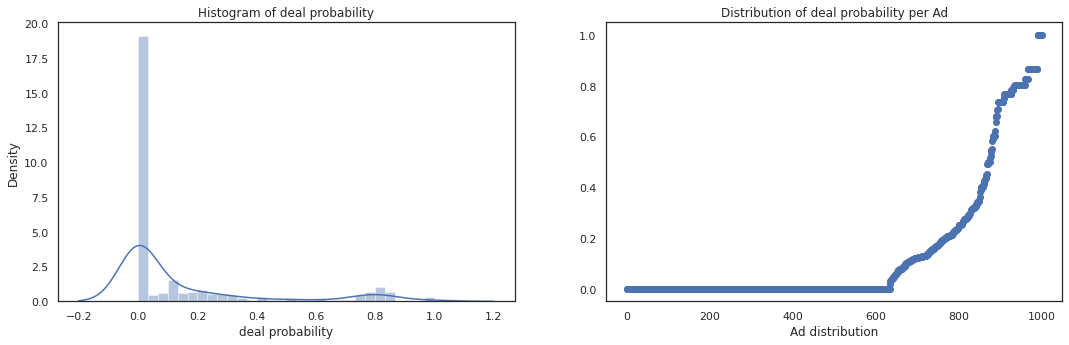

In [93]:
plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['deal_probability'])
plt.xlabel('deal probability', fontsize=12)
plt.title("Histogram of deal probability") # Histogram of likelihood that an ad actually sold something


plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.deal_probability.values))
plt.xlabel('Ad distribution', fontsize=12)
plt.title("Distribution of deal probability per Ad") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

Observações

- A partir do gráfico do histograma de distribuição, fica claro que a maioria dos itens tem probabilidade de negócio extremamente baixa, ou seja,
<br> cerca de 80%, enquanto muito poucos valores têm a probabilidade de negócio de 0,7 ou maior.

- Uma torre muito pequena é observada perto da probabilidade de 1,0, 
<br>indicando que há alguns itens no conjunto de dados com um valor muito alto de probabilidade de negociação.

- Pelo gráfico de distribuição, nota-se que amaior parte dos items (>50%) apresenta probabilidade de 0,0, e um parcela menor de items apresenta probabilidade não nula.

## <a id='hadoap'>4.2 Classes de probabilidade de negócio</a>

In [14]:
def _generate_bar_plot_hor(df, col, title, color, w=None, h=None, lm=0, limit=100):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(y=cnt_srs.index[::-1], x=cnt_srs.values[::-1], orientation = 'h',
        marker=dict(color=color))

    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [15]:
# bins of deal probability
interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
train['deal_class_two_classes'] = train['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")
train['deal_class_mult_classes'] = pd.cut(train.deal_probability, interval, labels=cats)

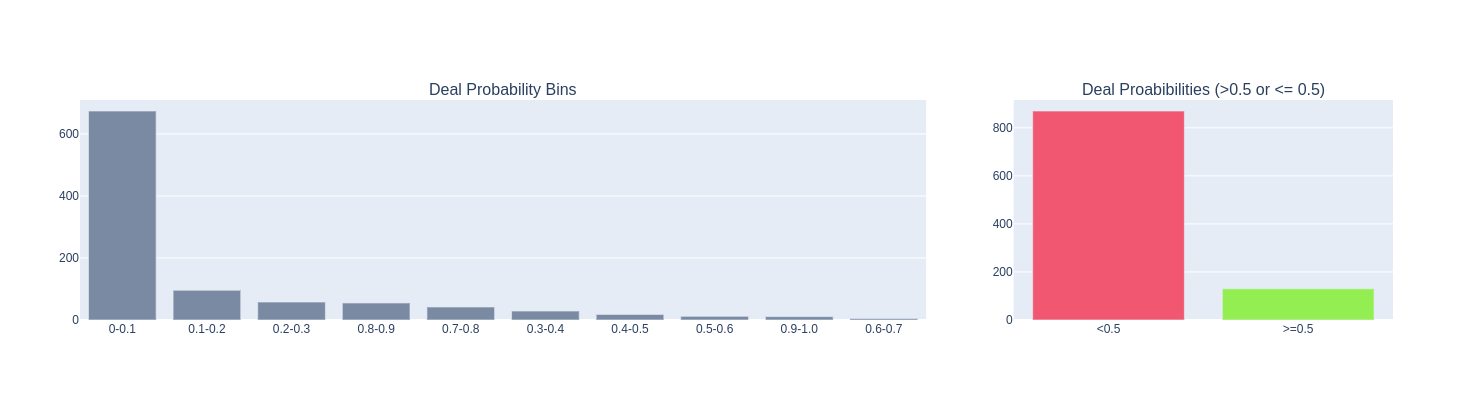

In [16]:
trace1 = _generate_bar_plot_ver(train, 'deal_class_mult_classes', "Deal Probability Bins", '#7a8aa3', lm=0, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train, 'deal_class_two_classes', "Deal Proabibilities (>0.5 or <= 0.5)", ['#f25771','#93ef51'], 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=3, specs=[[{'colspan': 2}, {},{}]], print_grid=False, subplot_titles = ['Deal Probability Bins','','Deal Proabibilities (>0.5 or <= 0.5)'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 3);

fig['layout'].update(height=400, title='',showlegend=False)
iplot(fig); 

#del train['deal_class_mult_classes']
#del train['deal_class_two_classes']

Observaçoes
- A maioria das categorias dominantes são itens com probabilidade de negócio: 0-0.1, 0.1-0.2
- Existem uma grande parcela de itens com probabilidade de negócio menor que 0,5, enquanto uma menor parcela de itens com probabilidade de negócio maior que 0,5


## <a id='hadoapi'>4.3 Histograma e distribuição do preço </a>

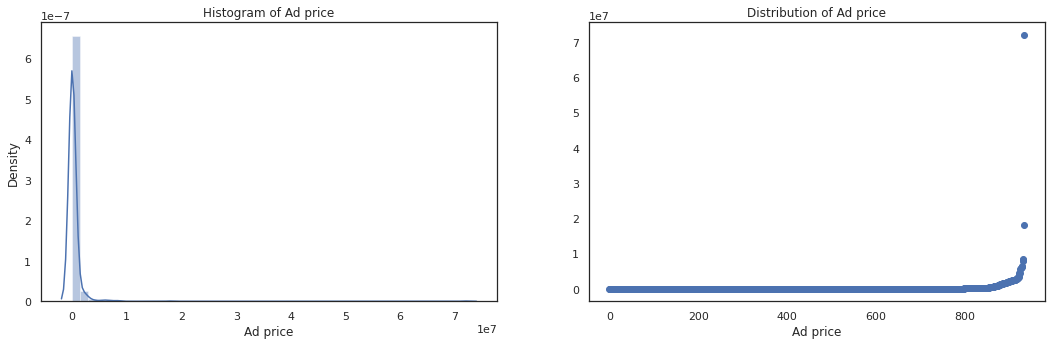

In [89]:
plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['price'])
plt.xlabel('Ad price', fontsize=12)
plt.title("Histogram of Ad price") # Histogram of likelihood that an ad actually sold something

plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.price.values))
plt.xlabel('Ad price', fontsize=12)
plt.title("Distribution of Ad price") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

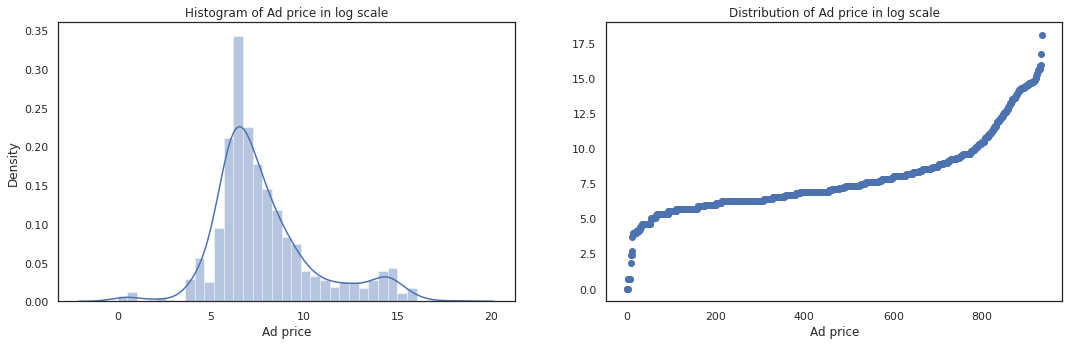

In [90]:
train['price_log'] = np.log(train['price'] + 1) # log scale of 'price'

plt.figure(figsize = (18, 5))

plt.subplot(121)
sns.distplot(train['price_log'])
plt.xlabel('Ad price', fontsize=12)
plt.title("Histogram of Ad price in log scale") # Histogram of likelihood that an ad actually sold something

plt.subplot(122)
plt.scatter(range(train.shape[0]), np.sort(train.price_log.values))
plt.xlabel('Ad price', fontsize=12)
plt.title("Distribution of Ad price in log scale") # Distribution of likelihood that an ad actually sold something

plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 0.9)
plt.show()

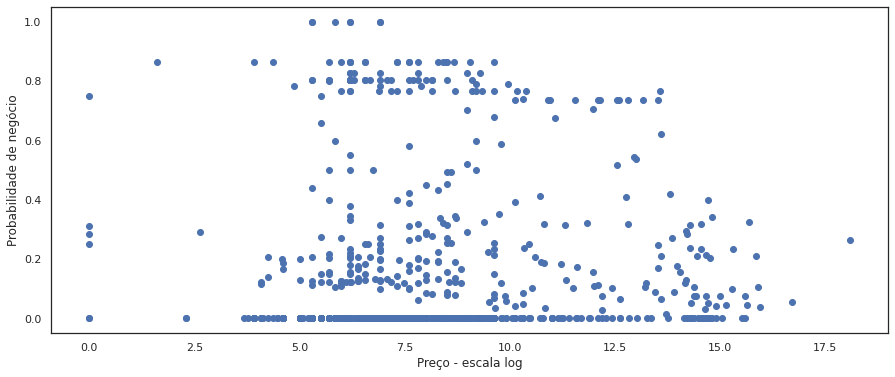

In [91]:
plt.figure(figsize=(15,6))
plt.scatter(np.log(train.price), train.deal_probability)
plt.xlabel('Preço - escala log')
plt.ylabel('Probabilidade de negócio')
plt.show()

## <a id='hadoapp'>4.4 Probabilidade de negócio em função do preço</a>

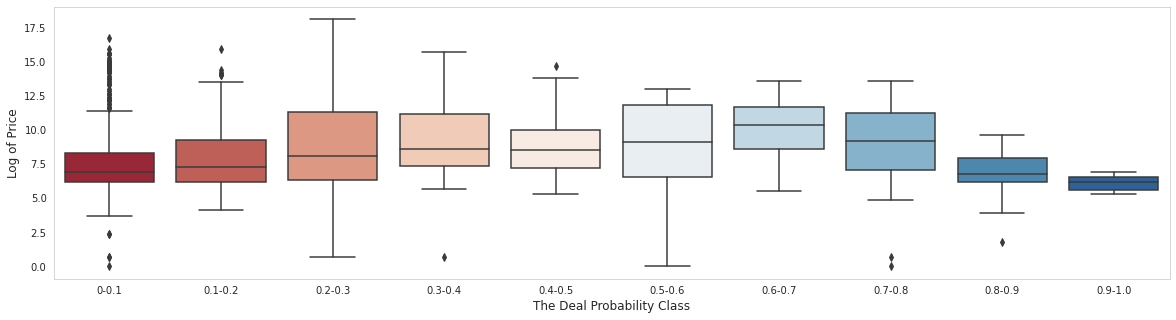

In [20]:
plt.figure(figsize = (20, 5))

train['price_log'] = np.log(train['price'] + 1)
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.boxplot(x='deal_class_mult_classes', y='price_log', data=train, palette="RdBu")
g.set_xlabel('The Deal Probability Class',fontsize=12)
g.set_ylabel('Log of Price',fontsize=12)
plt.show()

In [21]:
del train['deal_class_mult_classes']
del train['deal_class_two_classes']
del train['price_log']

Observações

- Itens com baixa probabilidade de compra têm o preço mais baixo, enquanto é ligeiramente mais alto para itens com probabilidade de compra maior.
- Nota-se que para itens com a maior probabilidade de compra (0.9-1.0), o preço é mais baixo que para os de menor probabilidade de compra.

## <a id='dodar'>4.5 Distribuição de itens por região</a>

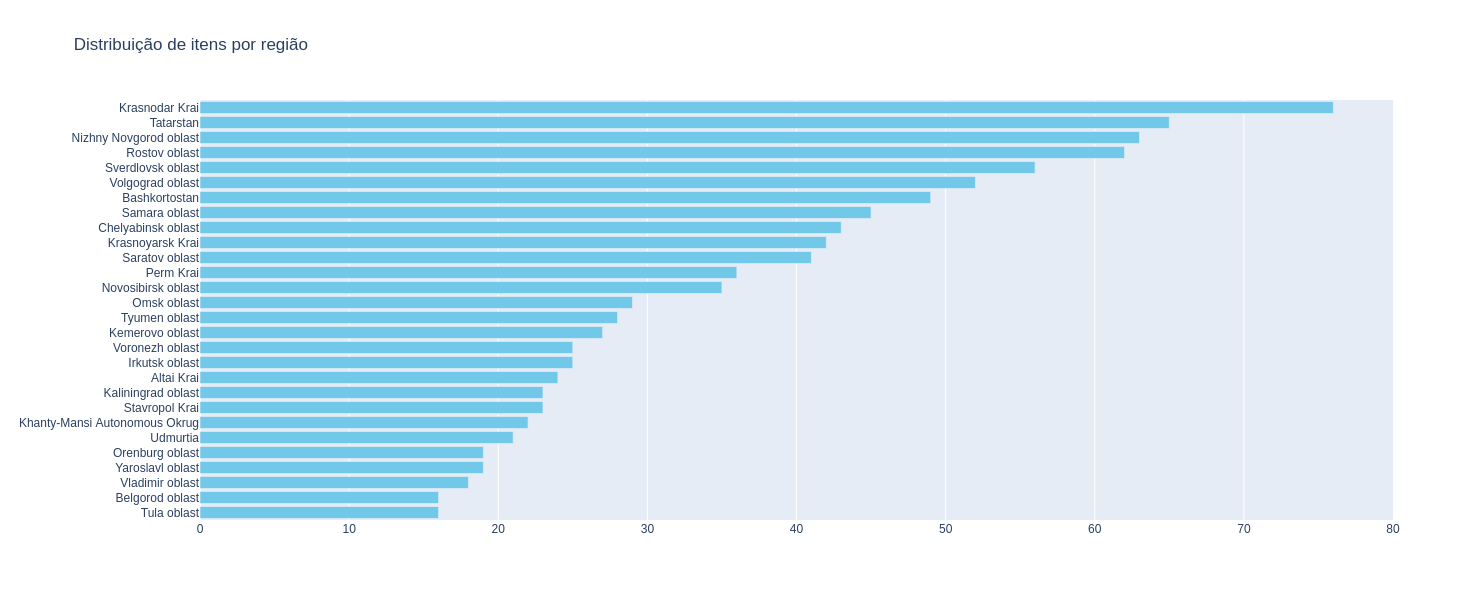

In [26]:
cols = ['parent_category_name_english', 'category_name_english', 'region_english', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']
_generate_bar_plot_hor(train, cols[2], "Distribuição de itens por região", '#71c8e8', 600, 600, 200, limit=30)

## <a id='dodari'>4.6 Distribuição de itens por cidade</a>

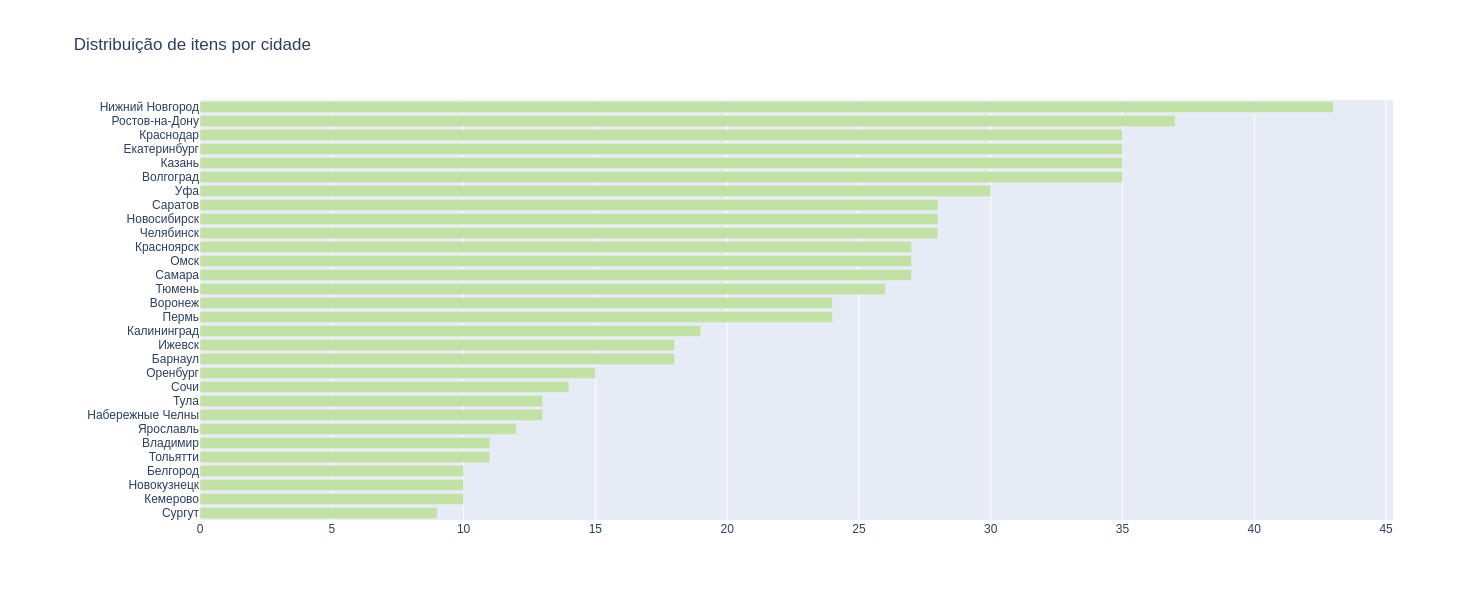

In [27]:
cols = ['parent_category_name_english', 'category_name_english', 'region_english', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']
_generate_bar_plot_hor(train, cols[3], "Distribuição de itens por cidade", '#c2e2a3', 600, 600, 200, limit=30)

## <a id='dodara'>4.7 Probabilidade de negócio por região</a>

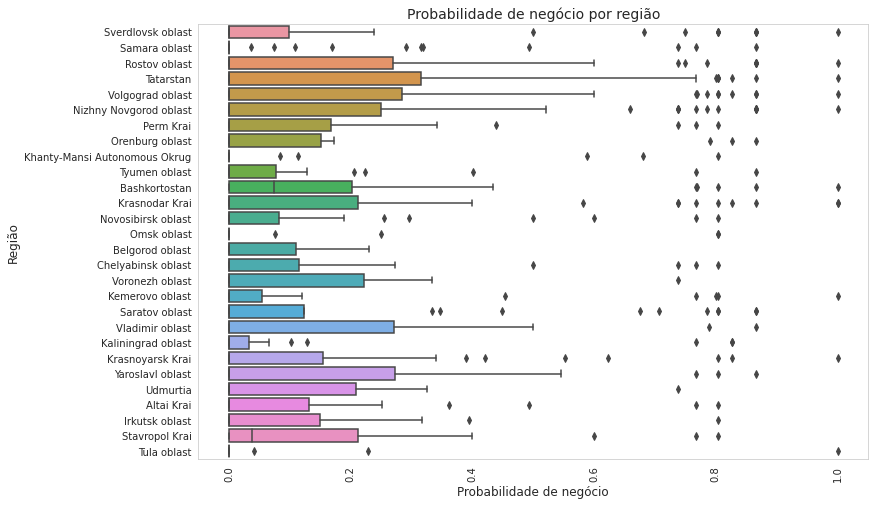

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(y="region_english", x="deal_probability", data=train)
plt.xlabel('Probabilidade de negócio', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.title("Probabilidade de negócio por região", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

## <a id='dodare'>4.8 Distribuição de itens por categoria principal</a>

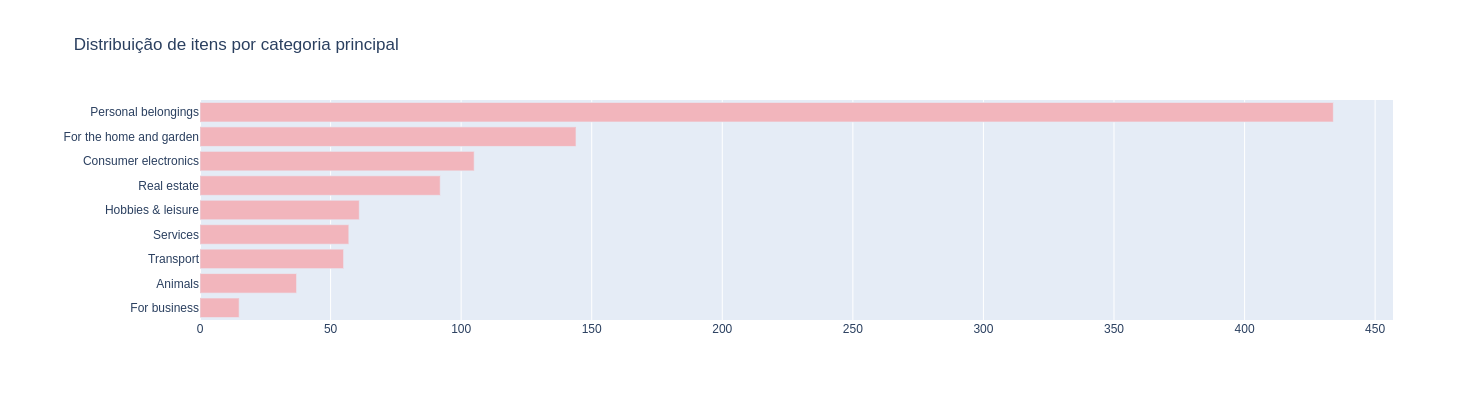

In [29]:
cols = ['parent_category_name_english', 'category_name_english', 'region_english', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']
_generate_bar_plot_hor(train, cols[0], "Distribuição de itens por categoria principal", '#f2b5bc', 600, 400, 200)

## <a id='dodai'>4.9 Probabilidade de negócio por categoria</a>

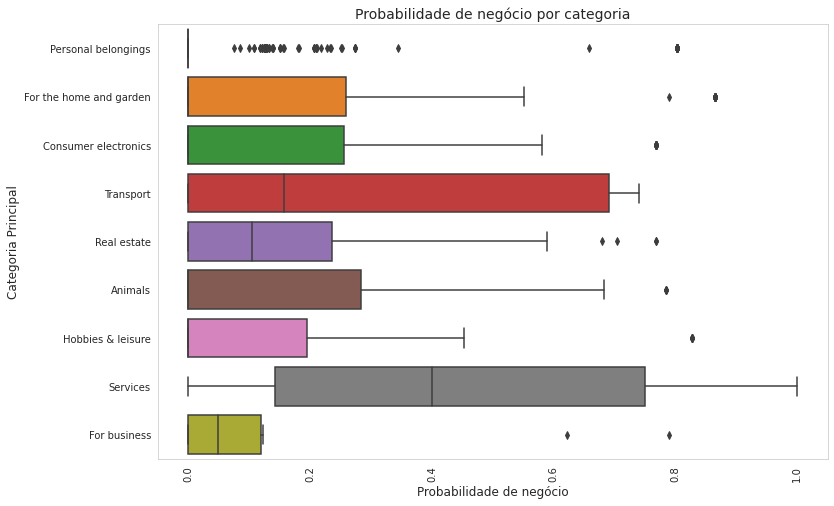

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(y="parent_category_name_english", x="deal_probability", data=train)
plt.xlabel('Probabilidade de negócio', fontsize=12)
plt.ylabel('Categoria Principal', fontsize=12)
plt.title("Probabilidade de negócio por categoria", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

## <a id='dodao'>4.10 Distribuição de itens por categoria</a>

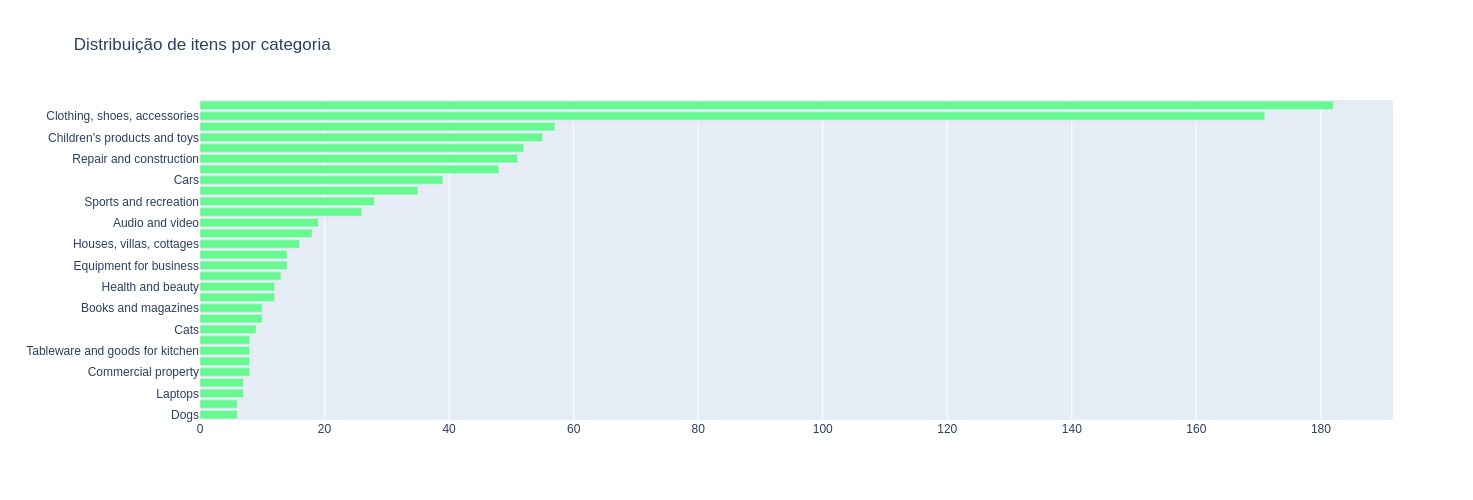

In [31]:
cols = ['parent_category_name_english', 'category_name_english', 'region_english', 'city', 'param_1', 'param_2', 'param_3', 'weekday', 'day','title_len', 'description_len', 'image_top_1', 'user_id']
_generate_bar_plot_hor(train, cols[1], "Distribuição de itens por categoria", '#66f992', 600, 500, 200, limit=30)

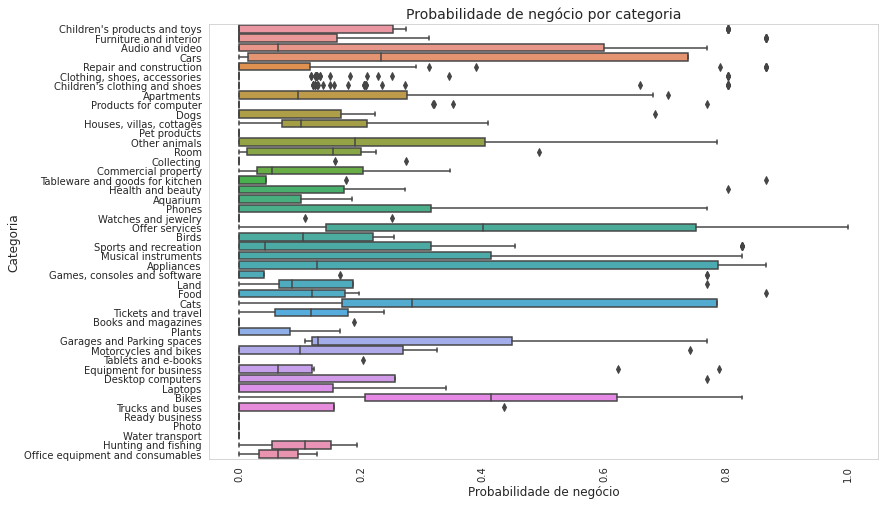

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(y="category_name_english", x="deal_probability", data=train)
plt.xlabel('Probabilidade de negócio', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.title("Probabilidade de negócio por categoria", fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

## <a id='dodart'>4.11 Distribuição do tipo de usuário</a>

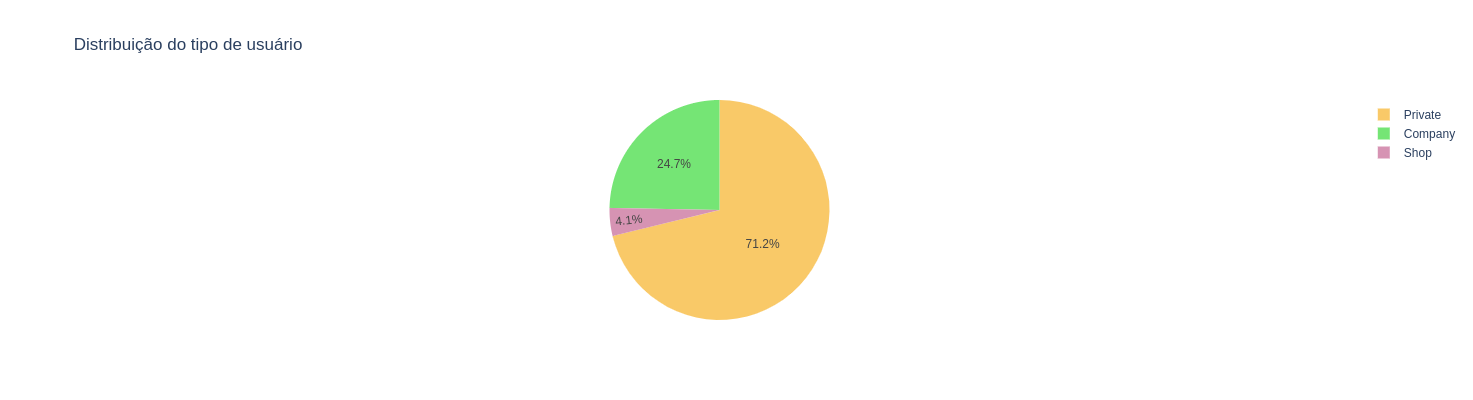

In [33]:
def _create_pie_chart(df, col):
    tm = df[col].value_counts()
    labels = list(tm.index)
    values = list(tm.values)
    trace = go.Pie(labels=labels, values=values, marker=dict(colors=['#f9c968', '#75e575', '#d693b3']))
    return trace
trace1 = _create_pie_chart(train, 'user_type')
layout = go.Layout(title='Distribuição do tipo de usuário', width=600, height=400, margin=dict(l=100))
data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

* **Distribuição dos tipos de usuários :**
  * Private users 71.6 % data
  * Comapny users 23.1 % data
  * Shop users 5.35 % data

## <a id='doday'>4.12 Distribuição dos parâmetros 1, 2 e 3</a>

In [34]:
train[['param_1', 'param_2', 'param_3']].head(15)

param_1             param_2      param_3
0     Постельные принадлежности                 NaN          NaN
1                        Другое                 NaN          NaN
2   Видео, DVD и Blu-ray плееры                 NaN          NaN
3          Автомобильные кресла                 NaN          NaN
4                    С пробегом          ВАЗ (LADA)         2110
5          Автомобильные кресла                 NaN          NaN
6            Сантехника и сауна                 NaN          NaN
7                Женская одежда              Джинсы           26
8                Женская одежда       Платья и юбки   > 50 (XXL)
9                   Для девочек               Обувь           25
10                         Сдам  На длительный срок            1
11               Женская одежда              Джинсы  Без размера
12             Товары для школы                 NaN          NaN
13                     Мониторы                 NaN          NaN
14             Немецкая овчарка                 NaN          NaN

In [35]:
train['param_1'].value_counts()

Женская одежда    140
Для мальчиков      95
Для девочек        87
Продам             66
С пробегом         37
                 ... 
Парфюмерия          1
Окна и балконы      1
Спорт               1
Сфера услуг         1
Грампластинки       1
Name: param_1, Length: 146, dtype: int64

In [36]:
train['param_2'].value_counts()

Обувь                  100
Верхняя одежда          96
Платья и юбки           42
Другое                  25
1                       22
                      ... 
Складское помещение      1
Утюги                    1
Daewoo                   1
Промназначения           1
Электрика                1
Name: param_2, Length: 94, dtype: int64

In [37]:
train['param_3'].value_counts()

42–44 (S)               36
Вторичка                30
86-92 см (1-2 года)     19
98-104 см (2-4 года)    17
44–46 (M)               16
                        ..
Niva                     1
Mistral                  1
Nexia                    1
Corolla                  1
Aygo                     1
Name: param_3, Length: 90, dtype: int64

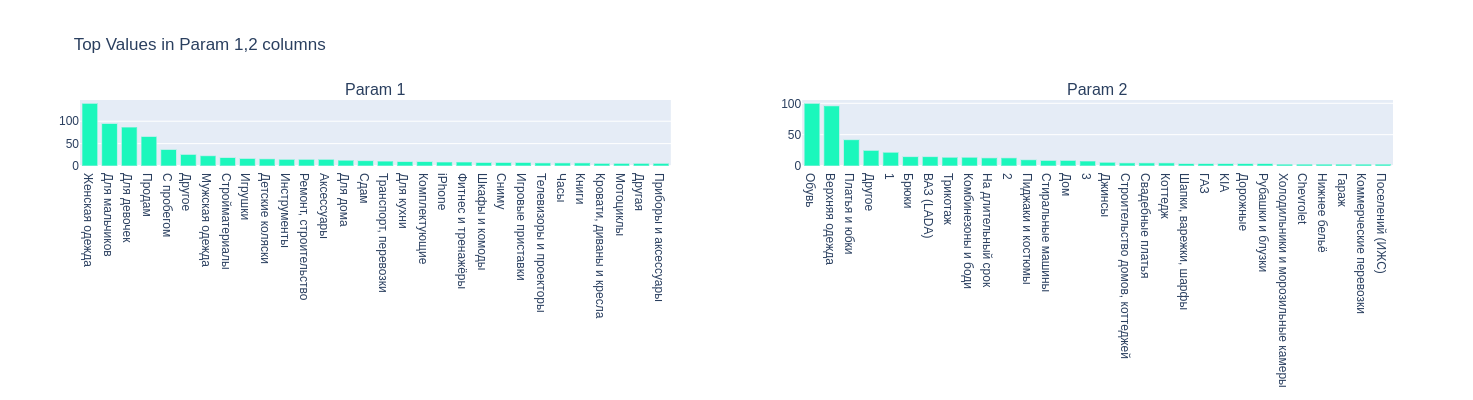

In [38]:
trace1 = _generate_bar_plot_ver(train, cols[4], "Param 1 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train, cols[5], "Param 2 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)
trace3 = _generate_bar_plot_ver(train, cols[6], "Param 3 Values", '#1bf7bc', 700, 400, 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Param 1','Param 2'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);
#fig.append_trace(trace3, 1, 3);

fig['layout'].update(height=400,title='Top Values in Param 1,2 columns', showlegend=False);
iplot(fig); 

In [39]:
## feature engineering 

# param_combined and its length
train['param_combined'] = train.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
train['param_combined'] = train['param_combined'].fillna(" ")
train['param_combined_len'] = train['param_combined'].apply(lambda x : len(x.split()))

Observacoes
- Param_1 e Param_2 contêm dados do tipo texto, com >50% de valores únicos.

- Param_3 contém um tipo de categorização muito distinto, como comprimentos em centímetros, quantidades, etc.

In [40]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability',
       'region_english', 'parent_category_name_english',
       'category_name_english', 'param_combined', 'param_combined_len'],
      dtype='object')

# <a id='t'>5. Série Temporal</a> 

In [41]:
train[['activation_date']].head()

activation_date
0      2017-03-28
1      2017-03-26
2      2017-03-20
3      2017-03-25
4      2017-03-16

In [42]:
periods_train.head()

item_id activation_date  date_from    date_to
0  8f5caef7afb0      2017-02-14 2017-03-15 2017-03-16
1  66218ff526d1      2017-02-16 2017-03-15 2017-03-18
2  b237d9539b21      2017-03-01 2017-03-15 2017-03-28
3  80bf58082ad3      2017-03-19 2017-03-19 2017-03-28
4  67a9944a7373      2017-03-14 2017-03-15 2017-03-28

**Novas features a partir da activation_date :**

 - month
 - weekday
 - month_day
 - year_day

In [52]:
train['activation_date'] = pd.to_datetime(train['activation_date'])
test['activation_date'] = pd.to_datetime(test['activation_date'])

# ***** Train data *******
train["month"] = train["activation_date"].dt.month
train['weekday'] = train['activation_date'].dt.weekday
train["day"] = train['activation_date'].dt.day
train["year_Day"] = train['activation_date'].dt.dayofyear

# ***** Test data *******
test["month"] = test["activation_date"].dt.month
test['weekday'] = test['activation_date'].dt.weekday
test["day"] = test['activation_date'].dt.day
test["year_Day"] = test['activation_date'].dt.dayofyear 

## Fill NaN
train["description"].fillna("NA", inplace=True)
test["description"].fillna("NA", inplace=True)

# periods_train
periods_train['total_period'] = periods_train['date_to'] - periods_train['date_from']

## <a id='fodsbdir'>5.1  Data de ativação nos dados de treino e teste</a>

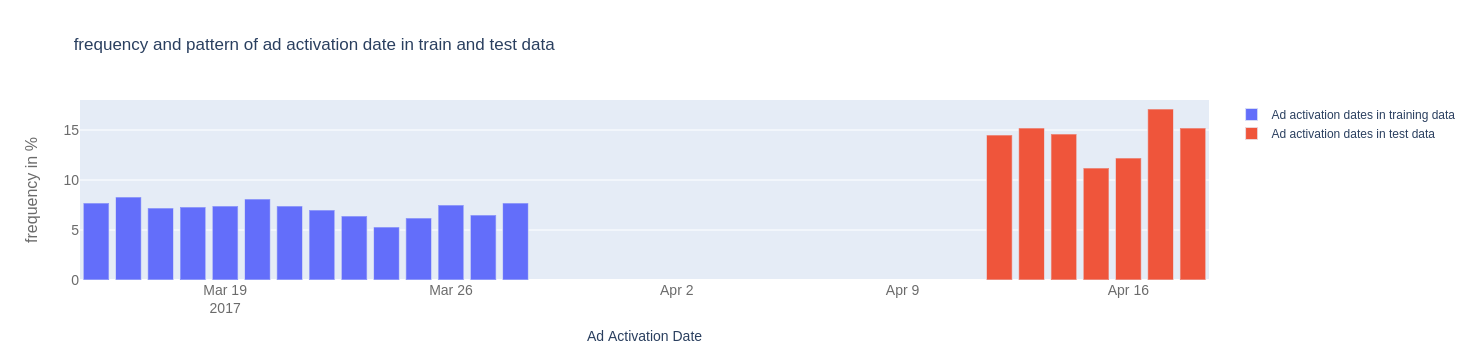

In [53]:
temp = train["activation_date"].value_counts()
temp1 = test["activation_date"].value_counts()
trace0 = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
    name = 'Ad activation dates in training data'
)
trace1 = go.Bar(
    x = temp1.index,
    y = (temp1 / temp1.sum())*100,
    name = 'Ad activation dates in test data'
)
data = [trace0, trace1]
layout = go.Layout(
    title = "frequency and pattern of ad activation date in train and test data",
    xaxis=dict(
        title='Ad Activation Date',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='frequency in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* A maior parte da data de ativação dos Ad se incia em 15-Março a 28-Março nos dados de treino, e 12-Abril a 19-Abril nos dados de teste.

## <a id='fodsbdit'>5.2  Distribuição da data de ativação</a>

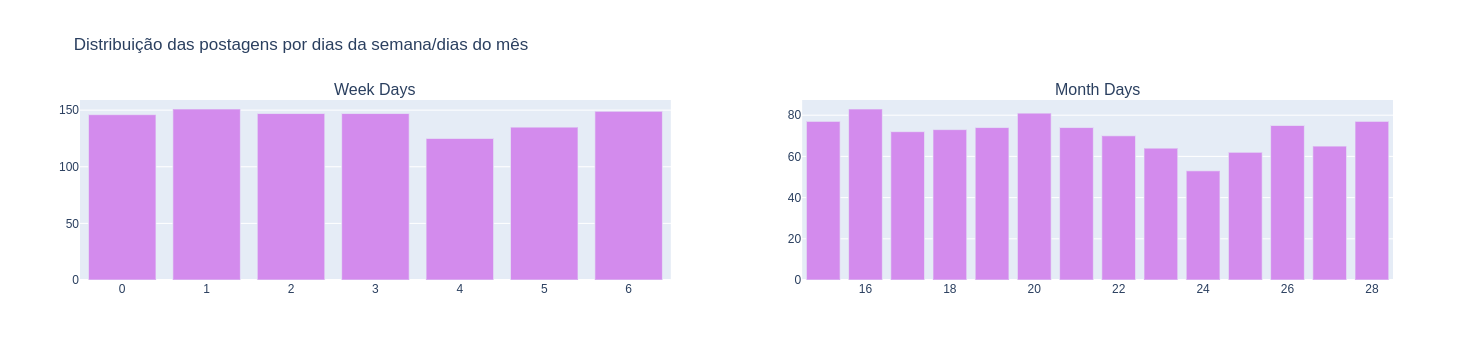

In [54]:
trace1 = _generate_bar_plot_ver(train, cols[7], "WeekDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train, cols[8], "MonthDays", '#d38bed', 700, 400, 200, limit=30, need_trace = True)


fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Week Days','Month Days'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 2);

fig['layout'].update(height=300,title='Distribuição das postagens por dias da semana/dias do mês', showlegend=False);
iplot(fig); 

## <a id='fodsbdiy'>5.3  Período de postagem de um Ad</a>

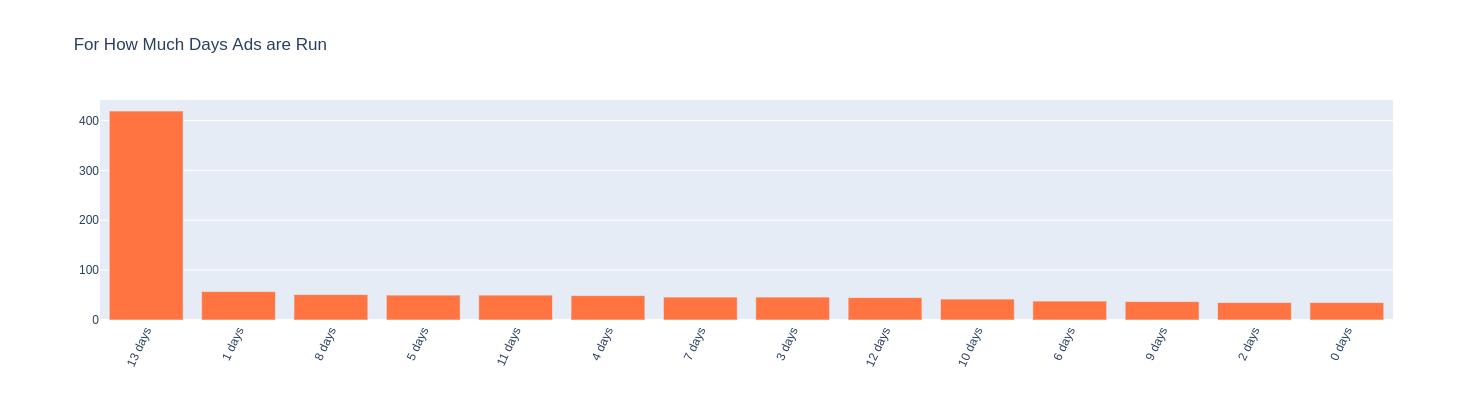

In [55]:
t = periods_train['total_period'].value_counts()

labels = list(t.index)
labels = [str(x).replace("00:00:00","").strip() for x in labels]
values = list(t.values)

layout = go.Layout(title='For How Much Days Ads are Run', width=600, height=400, margin=dict(l=100), xaxis=dict(tickangle=-65))
trace1 = go.Bar(x=labels, y=values, marker=dict(color="#FF7441"))

data = [trace1]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## <a id='fodsbdiu'>5.4  Tendência da variável preço</a>

### <a id='paetsd'>5.4.1 Média do preço a cada dia</a>

Text(0, 0.5, 'Price')

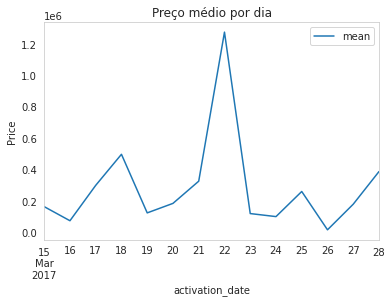

In [57]:
train["price"].resample("D").apply([np.mean]).plot()
plt.title("Preço médio por dia")
plt.ylabel("Price")

### <a id='paetsdt'>5.4.2 Média do preço a cada dois dias</a>

Text(0, 0.5, 'Price')

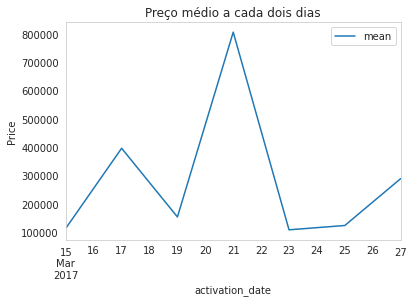

In [58]:
train["price"].resample("2D").apply([np.mean]).plot()
plt.title("Preço médio a cada dois dias")
plt.ylabel("Price")

### <a id='paetsdyu'>5.4.3 Probabilidade de negócio a cada dois dias</a>

Text(0, 0.5, 'deal probability')

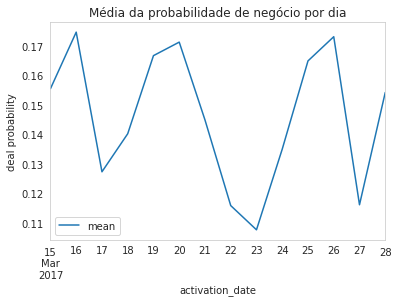

In [59]:
train["deal_probability"].resample("D").apply([np.mean]).plot()
plt.title("Média da probabilidade de negócio por dia")
plt.ylabel("deal probability")

### <a id='paetsdee'>5.4.4 Probabilidade de negócio a cada dois dias</a>

Text(0, 0.5, 'deal probability')

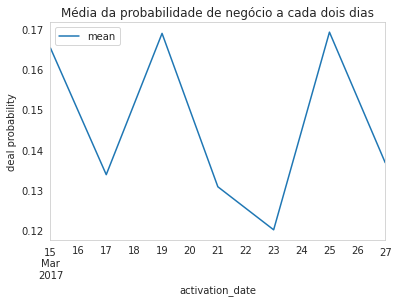

In [60]:
train["deal_probability"].resample("2D").apply([np.mean]).plot()
plt.title("Média da probabilidade de negócio a cada dois dias")
plt.ylabel("deal probability")

### <a id='tnodawdjshhs'>5.4.5 Período de exibição do Ad</a>

In [61]:
periods_train['total_days'] = periods_train['date_to'] - periods_train['date_from']
periods_test['total_days'] = periods_test['date_to'] - periods_test['date_from']
periods_train['total_days_value'] = periods_train['total_days'].dt.days

Text(0.5, 1.0, 'Média da período de exibição de um Ad')

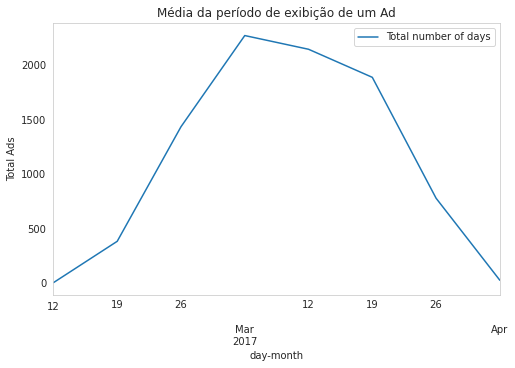

In [62]:
#df = periods_train.set_index('activation_date')
periods_train.index = pd.to_datetime(periods_train['activation_date'])
plt.figure(figsize = (8, 5))
ax = periods_train['total_days_value'].resample('w').sum().plot()
#ax = kiva_loans_data['funded_amount'].resample('w').sum().plot()
ax.set_ylabel('Total Ads')
ax.set_xlabel('day-month')
ax.set_xlim((pd.to_datetime(periods_train['activation_date'].min()), 
             pd.to_datetime(periods_train['activation_date'].max())))
ax.legend(["Total number of days"])
plt.title('Média da período de exibição de um Ad')

## <a id='totar'>5.5 Comportamento da variáveis textuais</a>

In [63]:
train[['title','description']]

title  \
activation_date                                      
2017-03-28                   Кокоби(кокон для сна)   
2017-03-26                       Стойка для Одежды   
2017-03-20                          Philips bluray   
2017-03-25                              Автокресло   
2017-03-16                          ВАЗ 2110, 2003   
...                                            ...   
2017-03-27                     Продам бутсы Adidas   
2017-03-27           Продам диск lara croft на psp   
2017-03-18       Коттедж 150 м² на участке 12 сот.   
2017-03-20                       Hyundai i30, 2012   
2017-03-24                            Породам окно   

                                                       description  
activation_date                                                     
2017-03-28       Кокон для сна малыша,пользовались меньше месяц...  
2017-03-26               Стойка для одежды, под вешалки. С бутика.  
2017-03-20       В хорошем состоянии, домашний кинотеатр с blu ...  
2017-03-25                                  Продам кресло от0-25кг  
2017-03-16                                Все вопросы по телефону.  
...                                                            ...  
2017-03-27       продам бутсы в отличном состоянии.отыграл 3 тр...  
2017-03-27                                                      NA  
2017-03-18       Продается чудесный коттедж в экологически чист...  
2017-03-20       Продается автомобиль  Hyundai i30. Был куплен ...  
2017-03-24       Глухое 1кам32 с.пакет, ш650в1440. Новое не под...  

[1000 rows x 2 columns]

Criar novas features :
* **char_count**
* **word_count**
* **word_density**
* **punctuation_count**
* **title_word_count**
* **upper_case_word_count**
* **stopword_count**

In [64]:
start_time=time.time()

# *******train data *********
#train['d_length'] = train['description'].apply(lambda x: len(str(x))) 
train['char_count'] = train['description'].apply(len)
train['word_count'] = train['description'].apply(lambda x: len(x.split()))
train['word_density'] = train['char_count'] / (train['word_count']+1)
train['punctuation_count'] = train['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
train['title_word_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
train['upper_case_word_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
train['stopword_count'] = train['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

# *******test data *********
#test['d_length'] = test['description'].apply(lambda x: len(str(x))) 
test['char_count'] = test['description'].apply(len)
test['word_count'] = test['description'].apply(lambda x: len(x.split()))
test['word_density'] = test['char_count'] / (test['word_count']+1)
test['punctuation_count'] = test['description'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 
test['title_word_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
test['upper_case_word_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
test['stopword_count'] = test['description'].apply(lambda x: len([wrd for wrd in x.split() if wrd.lower() in stop_words]))

end_time=time.time()
print("total time in the cuurent cell ",end_time-start_time,"s")

total time in the cuurent cell  0.1307051181793213 s


In [65]:
## Traduzir idioma

def find_and_replace_emojis(text):
    emoji_counter = 0
    # emoji_unicodes = map( (lambda x: x.encode('utf-8')), emoji.UNICODE_EMOJI.keys())
    emoji_unicodes = emoji.UNICODE_EMOJI.keys()
    for k in emoji_unicodes:
        try:
            if k in text:
                text = text.replace(k, ' ')
                emoji_counter = emoji_counter+1
        except Exception as e:
            print(e)
            print(k)
            print(text)
            raise e
    return [emoji_counter, text]

    
def translate(file_path, prefix, col_name):

    #input_csv = pd.read_csv(file_path)
    input_csv = file_path
    translator = Translator()
    translations = {}

    num_rows = input_csv.shape[0]

    print("***TRANSLATING "+col_name.upper()+ "***")

    # Translate 20 descriptions at a time
    for i in range(0, num_rows+10, 20):

        print("starting index: " + str(i)+" of "+ str(num_rows))
        orig_text_subset = input_csv[col_name][i:i+20].fillna("None").tolist()
        item_ids = input_csv['item_id'][i:i+20].tolist()

        try:
            translations_subset = translator.translate(orig_text_subset, src='ru', dest='en')
        except Exception as ex:
            translations_subset = []
            for s in orig_text_subset:

                formatted_str = s
                num_emojis = 0
                if type(ex == ValueError):
                    removed_emojis = find_and_replace_emojis(s)
                    num_emojis = removed_emojis[0]
                    formatted_str = removed_emojis[1]

                try:
                    if num_emojis > 0:
                        translations_subset.append(translator.translate(formatted_str, src='ru', dest='en').text + " NUM_EMOJIS: " + str(num_emojis))
                    else:
                        translations_subset.append(translator.translate(formatted_str, src='ru', dest='en').text)
                except:
                    if type(ex == ValueError):
                        translations_subset.append("UNABLE TO TRANSLATE" + " NUM_EMOJIS: " + str(num_emojis))
                    else:
                        translations_subset.append("UNABLE TO TRANSLATE")
            translations.update(dict(zip(item_ids, translations_subset)))
        else:
            translations.update(
                dict(
                    zip(
                        item_ids,
                        list(map( (lambda x: x.text), translations_subset ))
                        )
                    )
            )

    #df1 = pd.DataFrame(translations.items()).to_csv(prefix +'_' + col_name +'_translation.csv', encoding='utf-8')
    df1 = pd.DataFrame(translations.items())
    return df1

def translate_title_and_description(file_path, prefix, title_only, desc_only):
    
    if title_only == 'yes':
        df1 = translate(file_path, prefix, "title")
    elif desc_only == 'yes':
        df1 = translate(file_path, prefix, "description")
    else:
        df1 = translate(file_path, prefix, "title")
        df2 = translate(file_path, prefix, "description")        
        df1 = pd.concat([df1, df2])
        
    return df1

In [66]:
##translated = translate_title_and_description(train, 'output', 'yes', 'yes')

### <a id='tnoda'>5.5.1 Variável descrição</a>

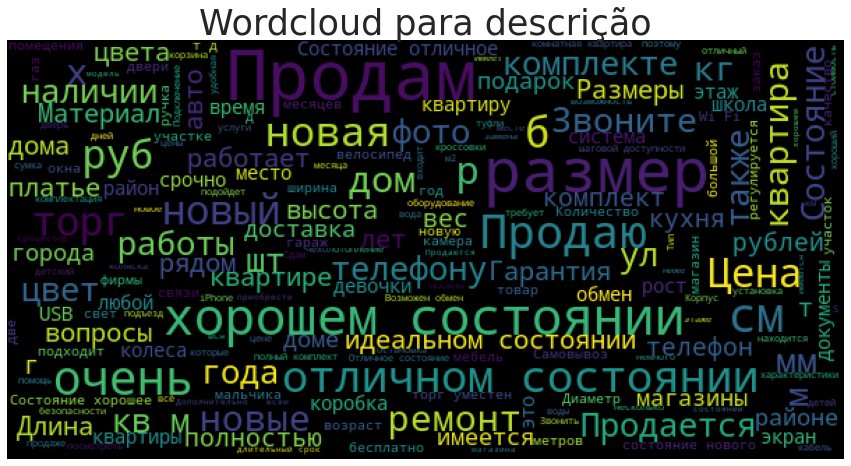

In [67]:
from wordcloud import WordCloud, STOPWORDS
names = test["description"][~pd.isnull(test["description"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300, stopwords=stop_words).generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud para descrição", fontsize=35)
plt.axis("off")
plt.show() 

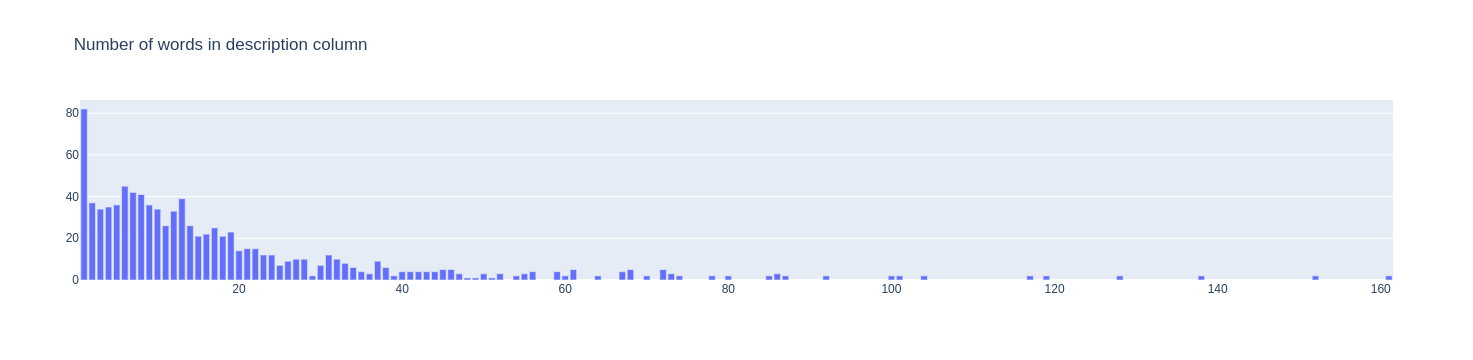

In [68]:
train["description"].fillna("NA", inplace=True)
train["desc_numOfWords"] = train["description"].apply(lambda x: len(x.split()))
temp = train["desc_numOfWords"].value_counts().head(80)
trace = go.Bar(
    x = temp.index,
    y = temp.values,
)
data = [trace]
layout = go.Layout(
    title = "Number of words in description column",
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
del train["desc_numOfWords"]

### <a id='tnodss'>5.5.2 Variável título</a>

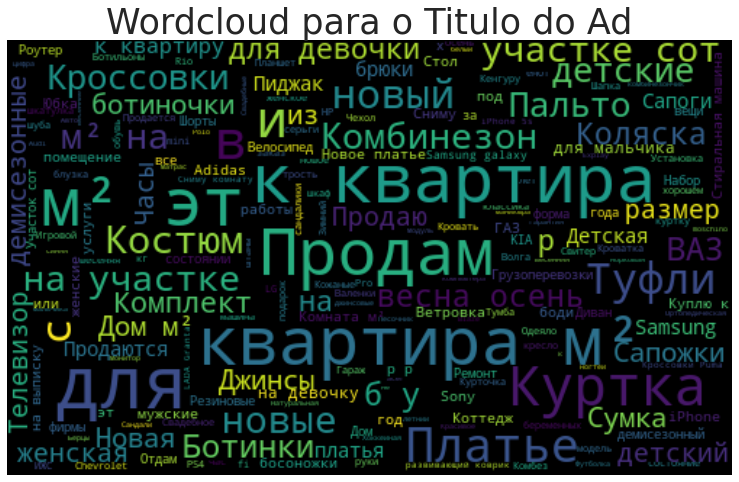

In [69]:
txt = " ".join(train.title)
def blue_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl({:d}, 80%, {:d}%)'.format(random.randint(180, 200), random.randint(60, 80))

wordcloud1 = WordCloud(max_font_size=50, width=500, height=300).generate(txt)
plt.figure(figsize=(16,8))
plt.title("Wordcloud para o Titulo do Ad", fontsize=35)
plt.imshow(wordcloud1.recolor(random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show() 

# <a id='tr'>6. Feature Engineering</a> 

# <a id='7'>7. Análise Multivariada</a> 

## <a id='7-1'> 7.1 Correlação de Pearson</a> 

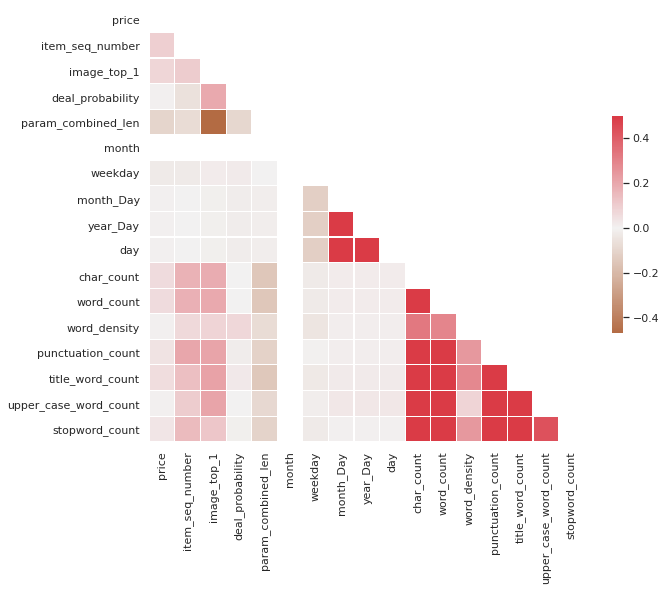

In [70]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style="white")

f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(30, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5});

## <a id='7-2'>7.2 Venn Diagram (features comuns nos dados de treino e teste)</a>

* **A Venn diagram uses overlapping circles or other shapes to illustrate the logical relationships between two or more sets of items. 
<br> Serve to visualize how the items are similar and different.**

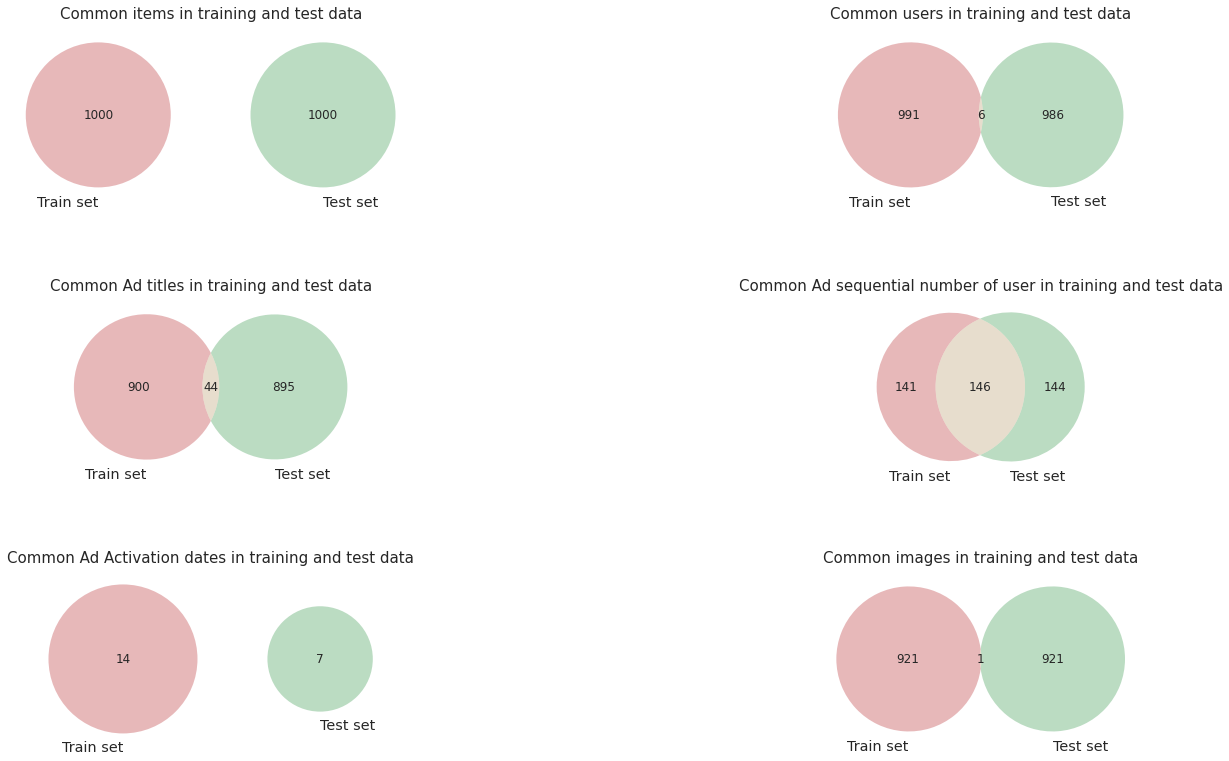

In [95]:
plt.figure(figsize=(23,13))

plt.subplot(321)
venn2([set(train.item_id.unique()), set(test.item_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common items in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(322)
venn2([set(train.user_id.unique()), set(test.user_id.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common users in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(323)
venn2([set(train.title.unique()), set(test.title.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad titles in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(324)
venn2([set(train.item_seq_number.unique()), set(test.item_seq_number.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad sequential number of user in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(325)
venn2([set(train.activation_date.unique()), set(test.activation_date.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common Ad Activation dates in training and test data", fontsize=15)
#plt.show()

#plt.figure(figsize=(15,8))
plt.subplot(326)
venn2([set(train.image.unique()), set(test.image.unique())], set_labels = ('Train set', 'Test set') )
plt.title("Common images in training and test data", fontsize=15)

plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 0.9)
plt.show()

* **Common items in training and test data :** 
* **Common users in training and test data :** 
* **CommonAd titles in training and test data :** 
* **CommonAd sequential number of users in training and test data :** 
* **CommonAd activation dates in training and test data :** 
* **Common images in training and test data :** 

## Final dataset

In [98]:
train.shape

(1000, 36)

In [100]:
train.columns.to_list()

['item_id',
 'user_id',
 'region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'title',
 'description',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'image',
 'image_top_1',
 'deal_probability',
 'region_english',
 'parent_category_name_english',
 'category_name_english',
 'param_combined',
 'param_combined_len',
 'month',
 'weekday',
 'month_Day',
 'year_Day',
 'day',
 'char_count',
 'word_count',
 'word_density',
 'punctuation_count',
 'title_word_count',
 'upper_case_word_count',
 'stopword_count',
 'price_log']

In [96]:
train.head()

item_id       user_id  region  city  \
activation_date                                             
2017-03-28       b912c3c6a6ad  e00f8ff2eaf9      19    81   
2017-03-26       2dac0150717d  39aeb48f0017      17   217   
2017-03-20       ba83aefab5dc  91e2f88dd6e3      16   213   
2017-03-25       02996f1dd2ea  bf5cccea572d      21   163   
2017-03-16       7c90be56d2ab  ef50846afc0b       4    51   

                 parent_category_name  category_name  param_1  param_2  \
activation_date                                                          
2017-03-28                          4             41      122       25   
2017-03-26                          2             22       59       25   
2017-03-20                          0              2       31       25   
2017-03-25                          4             41       18       25   
2017-03-16                          6              0      139       32   

                 param_3                  title  ... year_Day  day  \
activation_date                                  ...                 
2017-03-28           112  Кокоби(кокон для сна)  ...       87   28   
2017-03-26           112      Стойка для Одежды  ...       85   26   
2017-03-20           112         Philips bluray  ...       79   20   
2017-03-25           112             Автокресло  ...       84   25   
2017-03-16            13         ВАЗ 2110, 2003  ...       75   16   

                 char_count word_count  word_density punctuation_count  \
activation_date                                                          
2017-03-28               58          7         7.250                 2   
2017-03-26               41          7         5.125                 3   
2017-03-20               99         17         5.500                 5   
2017-03-25               22          3         5.500                 1   
2017-03-16               24          4         4.800                 1   

                 title_word_count  upper_case_word_count stopword_count  \
activation_date                                                           
2017-03-28                      1                      0              1   
2017-03-26                      2                      1              3   
2017-03-20                      3                      2              4   
2017-03-25                      1                      0              0   
2017-03-16                      1                      0              2   

                 price_log  
activation_date             
2017-03-28        5.993961  
2017-03-26        8.006701  
2017-03-20        8.294300  
2017-03-25        7.696667  
2017-03-16       10.596660  

[5 rows x 36 columns]

# <a id='bsc'>8. Síntese</a>